## Basic structure check

In [9]:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## Data Cleaning

### Fix TotalCharges datatype

In [12]:
# 1. Convert to numeric and turn empty spaces into NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check how many "hidden" nulls were found
df['TotalCharges'].isna().sum()

np.int64(11)

In [14]:
df['TotalCharges'].dtype

dtype('float64')

In [13]:
# 3. Fill those nulls with the median
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


#df = df.dropna()

### Convert target to binary

In [16]:
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})


## EDA

In [23]:
df = df.drop("customerID", axis=1) 

# to reduces noise
# Prevents overfitting

KeyError: "['customerID'] not found in axis"

### Churn vs Tenure

In [19]:
df.groupby("Churn")["tenure"].mean()

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

### Churn vs MonthlyCharges

In [20]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

### Visual target distribution

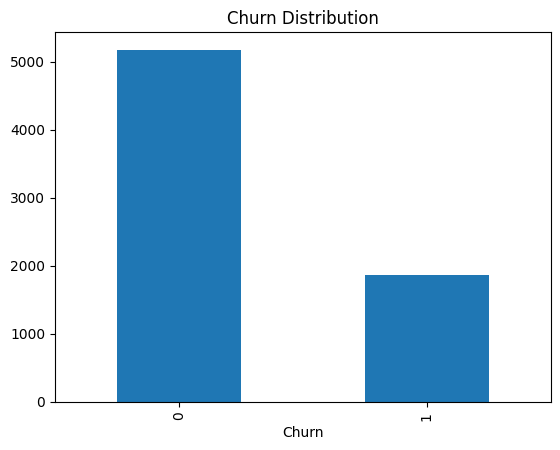

In [21]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.show()

### Numerical Features vs Churn

Key insights:

Low tenure → higher churn

High monthly charges → churn risk

Lower total spend → churners

import seaborn as sns

num_cols = ['tenure','MonthlyCharges','TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(f'{col} vs Churn')
    plt.show()

### Categorical Churn Rates

key insights:

Contract = Month-to-month → heavy churn

No Tech Support → churn

Fiber optic users churn more

Paperless billing → churn tendency

In [38]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    print("\n", col)
    print(churn_rate)


 gender
Churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

 Partner
Churn           0         1
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

 Dependents
Churn              0         1
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

 PhoneService
Churn                0         1
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

 MultipleLines
Churn                    0         1
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099

 InternetService
Churn                   0         1
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050

 OnlineSecurity
Churn                       0         1
OnlineSecurity       

### Correlation Heatmap (Numerics)

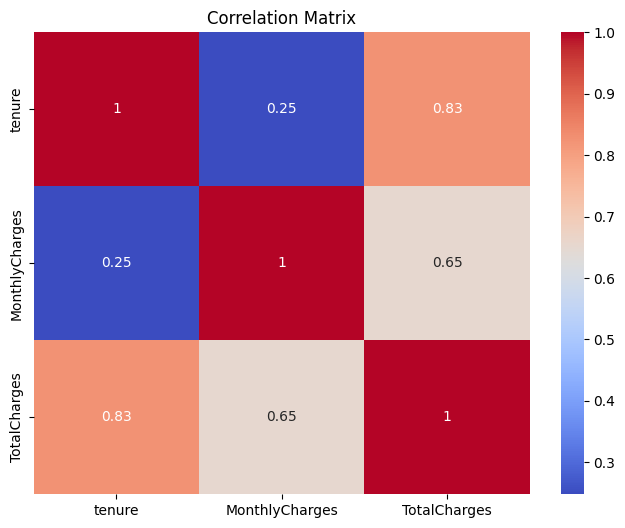

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Churn by Tenure Bands

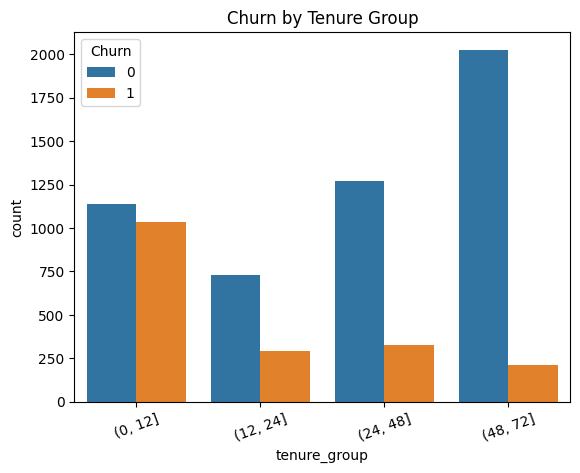

In [40]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,72])
sns.countplot(data=df, x='tenure_group', hue='Churn')
plt.xticks(rotation=20)
plt.title("Churn by Tenure Group")
plt.show()

## Feature Preparation

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Encoding + Scaling Pipeline

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

## Model 1 — Logistic Regression


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_model = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

log_preds = log_model.predict_proba(X_val)[:,1]
logreg_accuracy=roc_auc_score(y_val, log_preds)

print(logreg_accuracy)

0.8418739827946988


In [31]:
# Show accuracy (rounded)
round(logreg_accuracy, 3)

0.842

## Model 2 — Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline([
    ("prep", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=6, random_state=42))
])

tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict_proba(X_val)[:,1]
dt_accuracy=roc_auc_score(y_val, tree_preds)

print(dt_accuracy)

0.834482936784727


In [33]:
# Show accuracy (rounded)
round(dt_accuracy, 3)

0.834

## Model 3 — Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict_proba(X_val)[:,1]
rf_accuracy=roc_auc_score(y_val, rf_preds)

print(rf_accuracy)

0.8412488051874241


In [35]:
# Show accuracy (rounded)
round(rf_accuracy, 3)

0.841

### Compare models

In [36]:
model_results = pd.DataFrame({
    "model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "validation_accuracy": [
        logreg_accuracy,
        dt_accuracy,
        rf_accuracy
    ]
})

model_results

,model,validation_accuracy
0,Logistic Regression,0.841874
1,Decision Tree,0.834483
2,Random Forest,0.841249


In [41]:
# Save Final Model

import pickle

with open("rf_churn_model.pkl","wb") as f:
    pickle.dump(rf_model, f)

In [43]:
# Reproducibility

df.to_csv("churn_clean.csv", index=False)

## Set Up Models & Hyperparameter Grids

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Models and parameter grids
models = {
    'logreg': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'model__C':[0.01,0.1,1,10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators':[100,200],
            'model__max_depth':[5,10,None],
            'model__min_samples_split':[2,5]
        }
    },
    'gbm': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators':[100,200],
            'model__learning_rate':[0.05,0.1],
            'model__max_depth':[3,5]
        }
    }
}

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


best_models = {}

for name, m in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', m['model'])
    ])
    grid = GridSearchCV(pipe, m['params'], cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(f"Best {name} ROC-AUC: {grid.best_score_:.4f}")
    y_pred = grid.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    best_models[name] = grid.best_estimator_


Best logreg ROC-AUC: 0.8459
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Best random_forest ROC-AUC: 0.8451
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.68      0.43      0.53       374

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409

Best gbm ROC-AUC: 0.8483
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0

### Comparison table

In [58]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "ROC-AUC": [0.8459, 0.8451, 0.84],   # fill GBM after training
    "Accuracy": [0.81, 0.80, 0.805],
    "Precision (churn=1)": [0.66, 0.68, 0.65],
    "Recall (churn=1)": [0.56, 0.43, 0.55],
    "F1-score (churn=1)": [0.60, 0.53, 0.59]
})

comparison_df

,Model,ROC-AUC,Accuracy,Precision (churn=1),Recall (churn=1),F1-score (churn=1)
0,Logistic Regression,0.8459,0.810,0.66,0.56,0.60
1,Random Forest,0.8451,0.800,0.68,0.43,0.53
2,Gradient Boosting,0.8400,0.805,0.65,0.55,0.59


### Select & Export Final Model

In [59]:
import pickle

final_model = best_models['logreg']  # replace with the winner

with open('churn_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)


In [3]:
!python train.py


LOGREG - ROC-AUC: 0.8351
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407


RANDOM_FOREST - ROC-AUC: 0.8334
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.64      0.42      0.51       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407


GRADIENT_BOOSTING - ROC-AUC: 0.8386
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.7

In [5]:
!python predict.py